<a href="https://colab.research.google.com/github/InezaRW/InezaRW/blob/main/RPM_using_on_DocuCam_Data_RFR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries used

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from datetime import timedelta
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import VotingRegressor
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib

#1. Loading Docucam Weather Data, extract TimeStamp it into DateTime form, Rearrange them into Column form.


In [ ]:
data = '/content/Docucam_data.csv'

# Read the data into a DataFrame
original_data = pd.read_csv(data, sep=';')

# Remove duplicate header
original_data = original_data[original_data['TimeStamp'] != 'TimeStamp']

# Convert 'TimeStamp' to datetime
original_data['TimeStamp'] = pd.to_datetime(original_data['TimeStamp'].str.replace('T', ' ').str.replace('Z', ''), errors='coerce')

# Extract Date and Time
original_data['Date'] = original_data['TimeStamp'].dt.date
original_data['Time'] = original_data['TimeStamp'].dt.time

# Rearrange columns
modified_data = original_data[['TimeStamp', 'Date', 'Time', 'Ticks', 'ACTUAL_TEMPERATURE', 'HUMIDITY', 'ILLUMINATION', 'RAIN_COUNTER', 'SUNSHINEDURATION', 'WIND_SPEED']]

# Save the DataFrame to a new CSV file with columns separated
# modified_data.to_csv('/content/new_og_ineza_docucam_data.csv', index=False)

<ipython-input-4-6440f0ae557f>:4: DtypeWarning: Columns (1,2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  original_data = pd.read_csv(data, sep=';')


#2. Loading new saved data, where df is dataframe

In [ ]:
df = pd.read_csv('/content/new_og_ineza_docucam_data.csv')

# Display the first few rows of the df
print(df.head())

# Display basic information about the dataset
print("\nDataset Info:")
print(df.info())


                       TimeStamp        Date             Time  \
0  2022-10-14 10:32:50.676166200  2022-10-14  10:32:50.676166   
1  2022-10-14 10:34:00.000000000  2022-10-14         10:34:00   
2  2022-10-14 10:36:00.000000000  2022-10-14         10:36:00   
3  2022-10-14 10:38:00.000000000  2022-10-14         10:38:00   
4  2022-10-14 10:40:00.000000000  2022-10-14         10:40:00   

                Ticks  ACTUAL_TEMPERATURE  HUMIDITY  ILLUMINATION  \
0  638013403706761662                20.6      52.0      100000.0   
1  638013404400000000                20.8      52.0      100000.0   
2  638013405600000000                20.8      52.0      100000.0   
3  638013406800000000                21.0      52.0      100000.0   
4  638013408000000000                20.5      51.0      100000.0   

   RAIN_COUNTER  SUNSHINEDURATION  WIND_SPEED  
0         248.4            8970.0        22.5  
1         248.4            8972.0        22.5  
2         248.4            8972.0        22.5  
3 

#3. Description

In [ ]:
# Descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(df.describe())

# Count of missing values in each column
print("\nMissing Values Count:")
print(df.isnull().sum())

# Unique values in each column
print("\nUnique Values:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")

# Correlation matrix for numerical columns
print("\nCorrelation Matrix:")
print(df.corr())



Descriptive Statistics:
              Ticks  ACTUAL_TEMPERATURE       HUMIDITY   ILLUMINATION  \
count  2.644000e+05       264350.000000  264350.000000  264350.000000   
mean   6.381721e+17           15.791595      72.300053    5748.246781   
std    1.244424e+15            2.592596      13.342156   17491.031923   
min    6.383346e+13            0.000000       0.000000       0.000000   
25%    6.380946e+17           13.900000      64.000000       0.000000   
50%    6.381745e+17           15.300000      74.000000      79.300000   
75%    6.382545e+17           17.700000      83.000000    5336.000000   
max    6.383346e+17           24.600000      97.000000  100000.000000   

        RAIN_COUNTER  SUNSHINEDURATION     WIND_SPEED  
count  264350.000000     264350.000000  264350.000000  
mean      895.034300       8264.934904       5.425784  
std       262.624139       4681.375834       7.814417  
min         0.000000          0.000000       0.000000  
25%       736.000000       4185.00000

<ipython-input-6-9290fb33df68>:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


#4. Display df

In [ ]:
pd.set_option("display.max_columns", None)
df

,TimeStamp,Date,Time,Ticks,ACTUAL_TEMPERATURE,HUMIDITY,ILLUMINATION,RAIN_COUNTER,SUNSHINEDURATION,WIND_SPEED
0,2022-10-14 10:32:50.676166200,2022-10-14,10:32:50.676166,638013403706761662,20.6,52.0,100000.0,248.4,8970.0,22.5
1,2022-10-14 10:34:00.000000000,2022-10-14,10:34:00,638013404400000000,20.8,52.0,100000.0,248.4,8972.0,22.5
2,2022-10-14 10:36:00.000000000,2022-10-14,10:36:00,638013405600000000,20.8,52.0,100000.0,248.4,8972.0,22.5
3,2022-10-14 10:38:00.000000000,2022-10-14,10:38:00,638013406800000000,21.0,52.0,100000.0,248.4,8975.0,25.7
4,2022-10-14 10:40:00.000000000,2022-10-14,10:40:00,638013408000000000,20.5,51.0,100000.0,248.4,8977.0,19.7
...,...,...,...,...,...,...,...,...,...,...
264395,2023-10-21 05:40:00,2023-10-21,05:40:00,638334636000000000,18.9,62.0,5980.0,1123.7,13907.0,0.0
264396,2023-10-21 05:42:00,2023-10-21,05:42:00,638334637200000000,18.7,61.0,5969.0,1123.7,13909.0,0.0
264397,2023-10-21 05:44:00,2023-10-21,05:44:00,638334638400000000,18.8,62.0,5965.0,1123.7,13911.0,0.0
264398,2023-10-21 05:46:00,2023-10-21,05:46:00,638334639600000000,18.8,62.0,5965.0,1123.7,13911.0,0.0


#5. Feature count

In [ ]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 7
Discrete feature Count 0
Continuous feature Count 7
Categorical feature Count 3


#6. Handle Missing Values

In [ ]:
df.isnull().sum()*100/len(df)

TimeStamp             0.000000
Date                  0.000000
Time                  0.000000
Ticks                 0.000000
ACTUAL_TEMPERATURE    0.018911
HUMIDITY              0.018911
ILLUMINATION          0.018911
RAIN_COUNTER          0.018911
SUNSHINEDURATION      0.018911
WIND_SPEED            0.018911
dtype: float64

#7. Check for numerical feature before fillin

In [ ]:
print(numerical_feature)

['Ticks', 'ACTUAL_TEMPERATURE', 'HUMIDITY', 'ILLUMINATION', 'RAIN_COUNTER', 'SUNSHINEDURATION', 'WIND_SPEED']


#8. Handling the missing values

In [ ]:
# Handle missing values in specified columns
columns_to_fill = ['ACTUAL_TEMPERATURE', 'HUMIDITY', 'ILLUMINATION', 'RAIN_COUNTER', 'SUNSHINEDURATION', 'WIND_SPEED']

# Option 1: Fill missing values with the mean
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].mean())

# Option 2: Fill missing values with the median
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].median())
# Display the shape of the original DataFrame
print("Original DataFrame shape:", df.shape)

# Display the shape of the DataFrame without outliers
print("DataFrame shape after removing outliers:", df_no_outliers.shape)


Original DataFrame shape: (264400, 10)
DataFrame shape after removing outliers: (245168, 10)


#9. Check for remaining Missing Values

In [ ]:
df.isnull().sum()*100/len(df)

TimeStamp             0.0
Date                  0.0
Time                  0.0
Ticks                 0.0
ACTUAL_TEMPERATURE    0.0
HUMIDITY              0.0
ILLUMINATION          0.0
RAIN_COUNTER          0.0
SUNSHINEDURATION      0.0
WIND_SPEED            0.0
dtype: float64

#10. Calculates the Spearman correlation matrix for the df and visualizes it using a heatmap to reveal the pairwise relationships between variables, aiding in understanding the monotonic associations between features.

<ipython-input-37-f6261976a4dd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr(method="spearman")


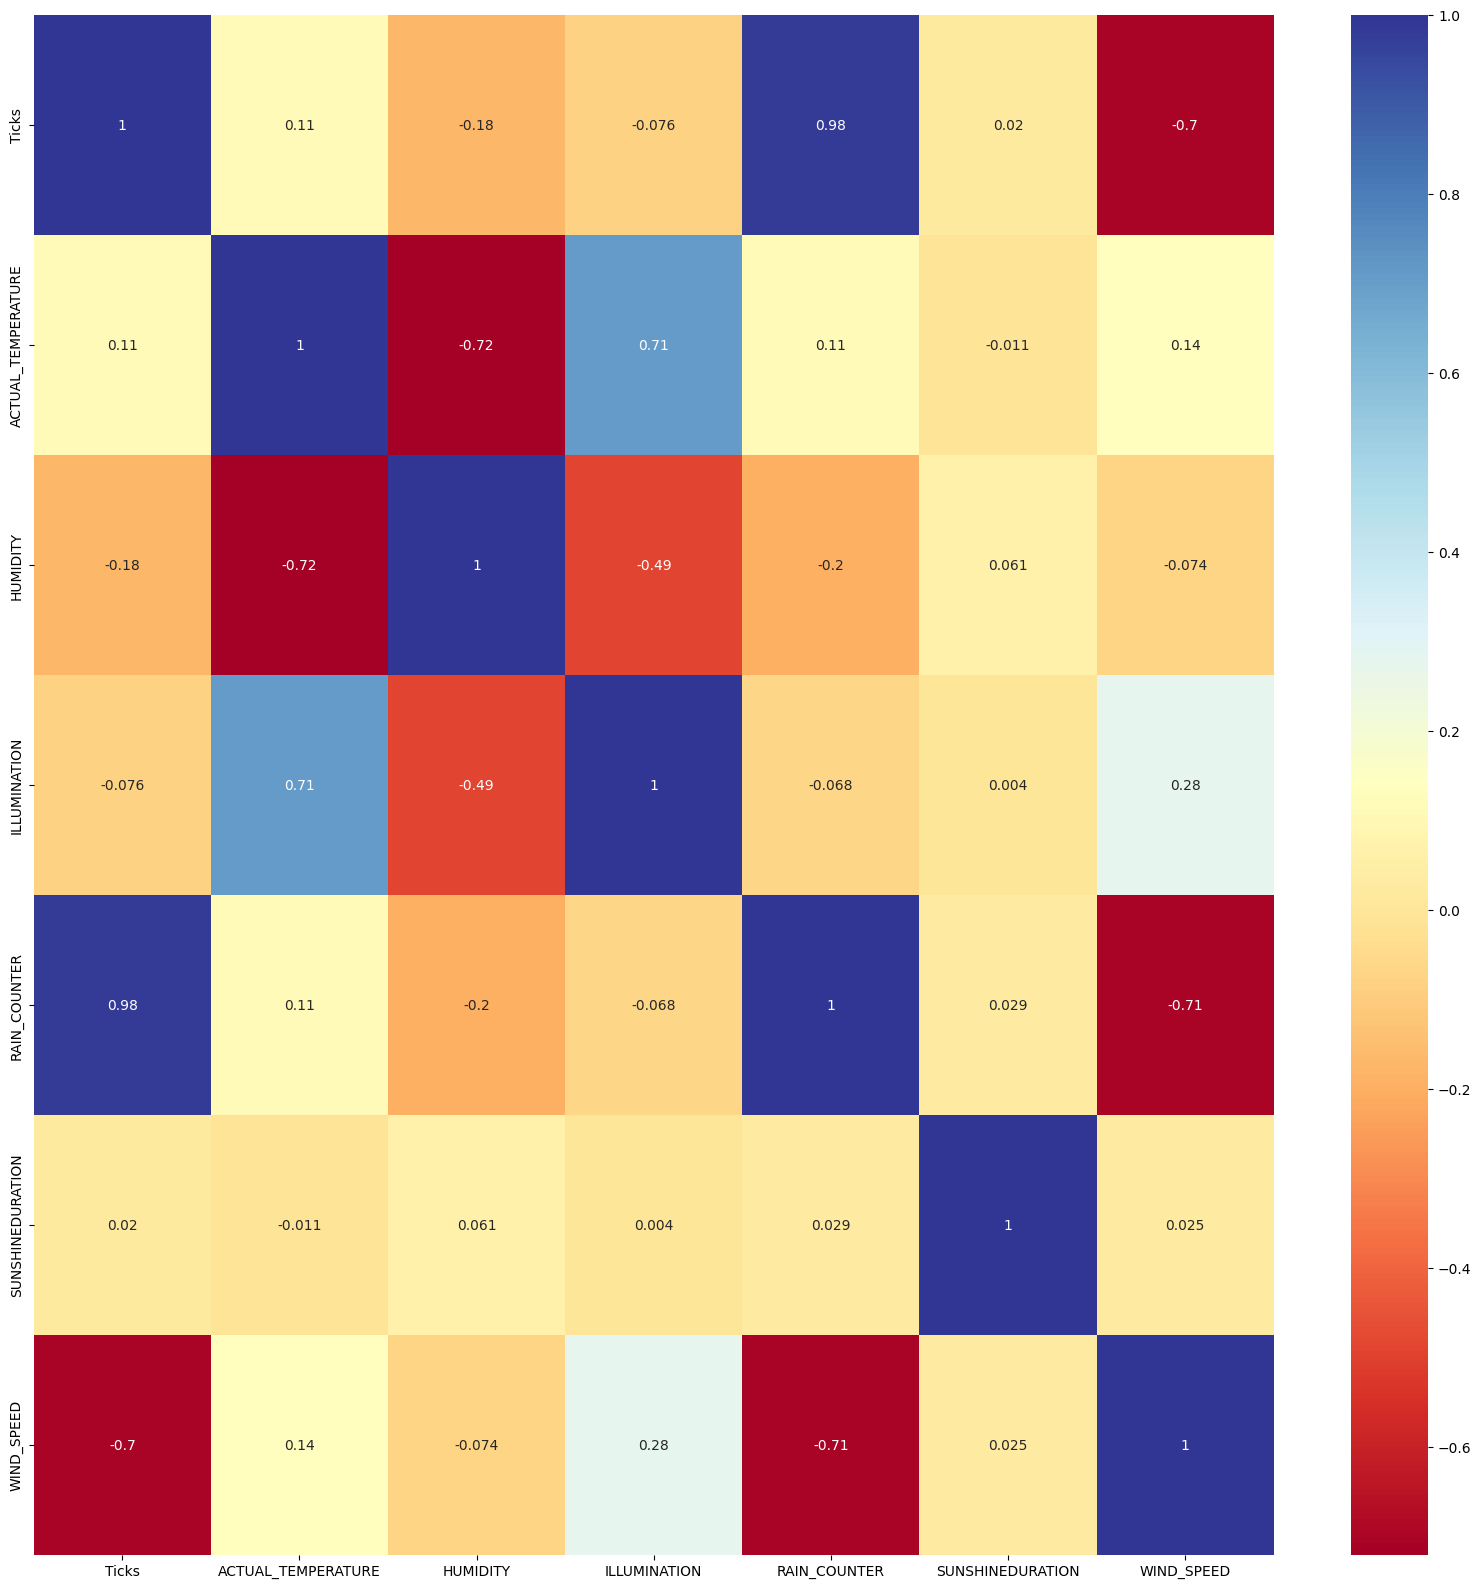

In [ ]:
corrmat = df.corr(method="spearman")
plt.figure(figsize=(20, 20))
cmap = sns.color_palette("RdYlBu", as_cmap=True)
g = sns.heatmap(corrmat, annot=True, cmap=cmap)
plt.show()

#11. Understand the characteristics of individual features by visual overview of the distribution of values for each continuous feature in the df.

<ipython-input-38-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


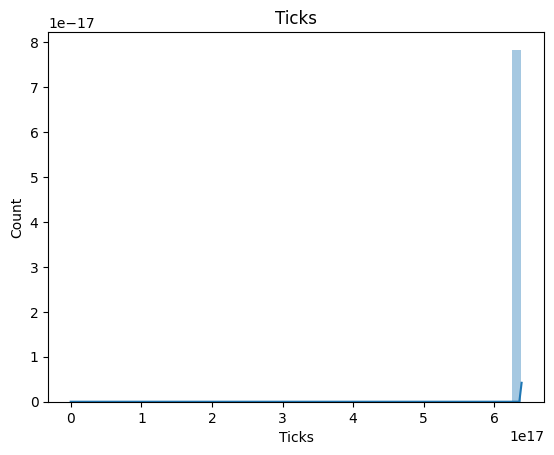

<Figure size 1500x1500 with 0 Axes>

<ipython-input-38-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


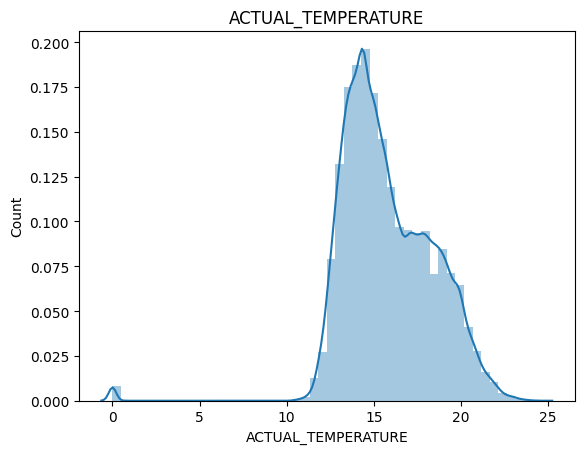

<Figure size 1500x1500 with 0 Axes>

<ipython-input-38-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


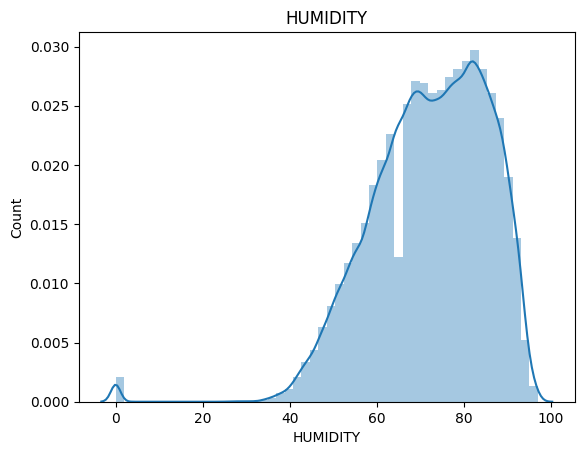

<Figure size 1500x1500 with 0 Axes>

<ipython-input-38-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


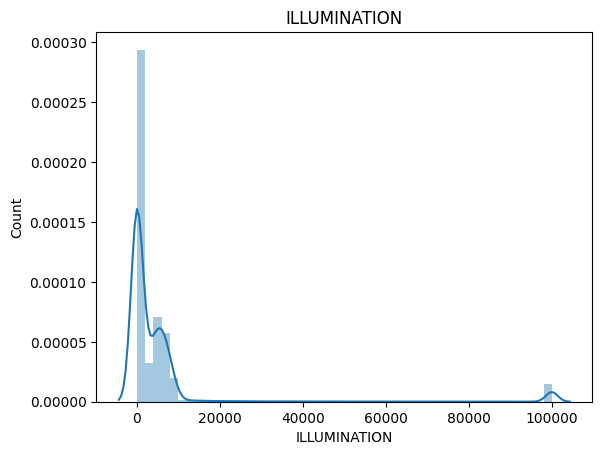

<Figure size 1500x1500 with 0 Axes>

<ipython-input-38-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


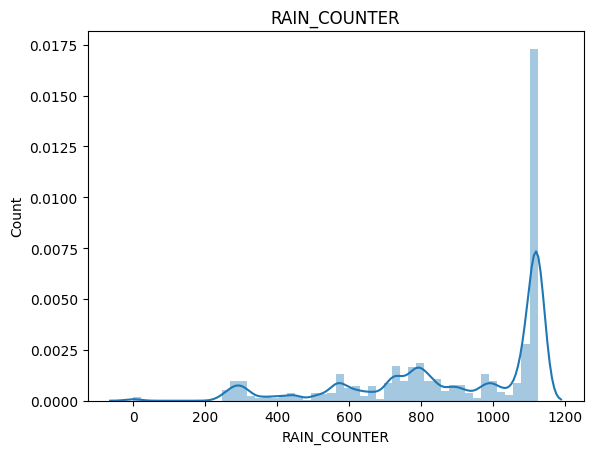

<Figure size 1500x1500 with 0 Axes>

<ipython-input-38-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


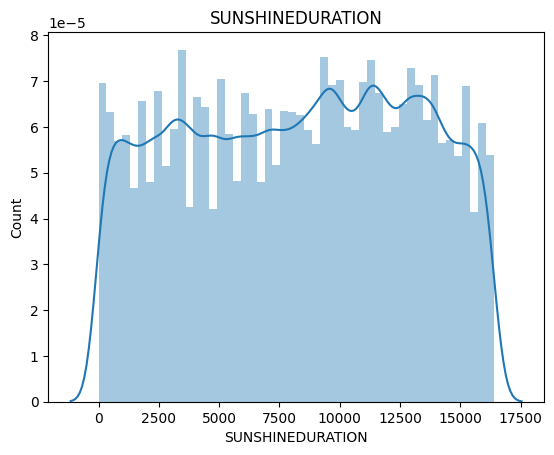

<Figure size 1500x1500 with 0 Axes>

<ipython-input-38-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


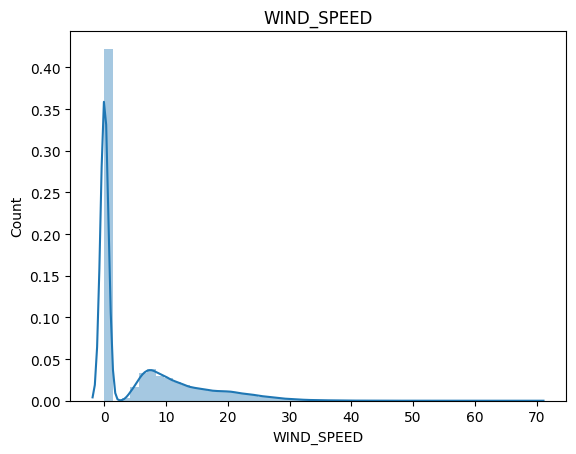

<Figure size 1500x1500 with 0 Axes>

In [ ]:
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

#12. A for loop was used to plot a boxplot for all the continuous features to see the outliers

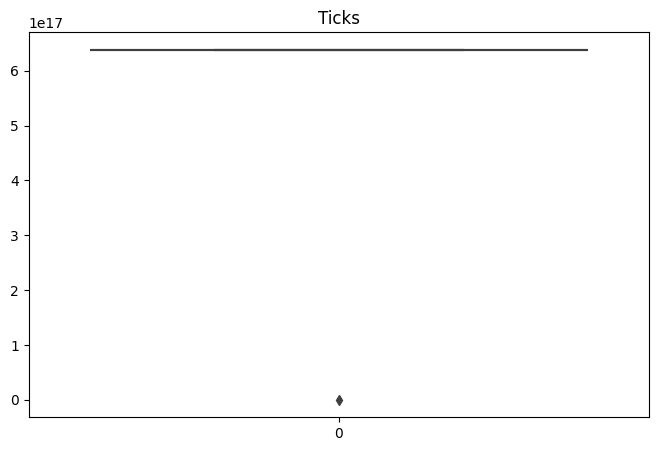

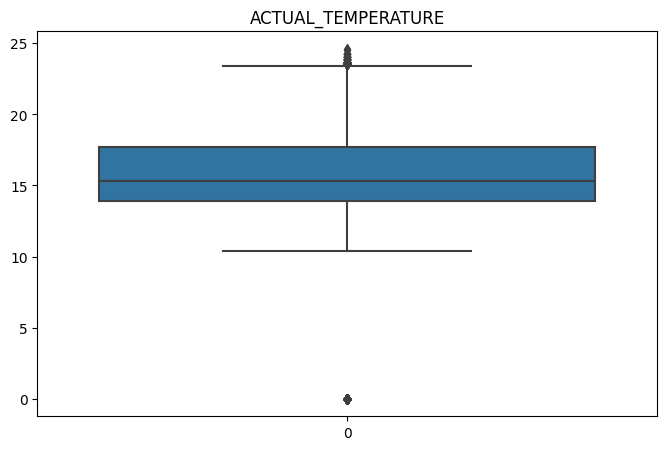

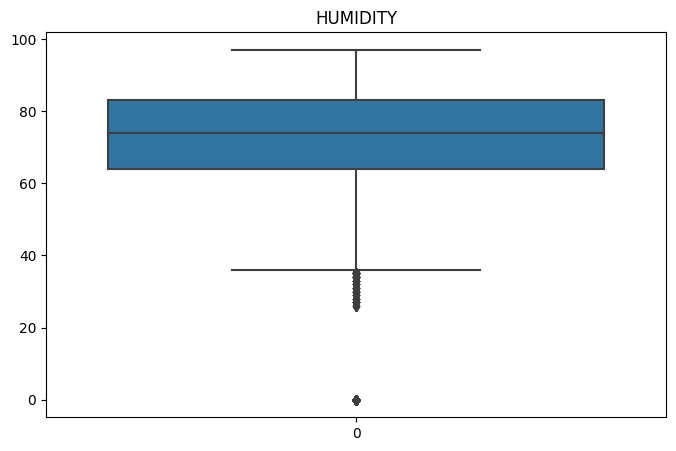

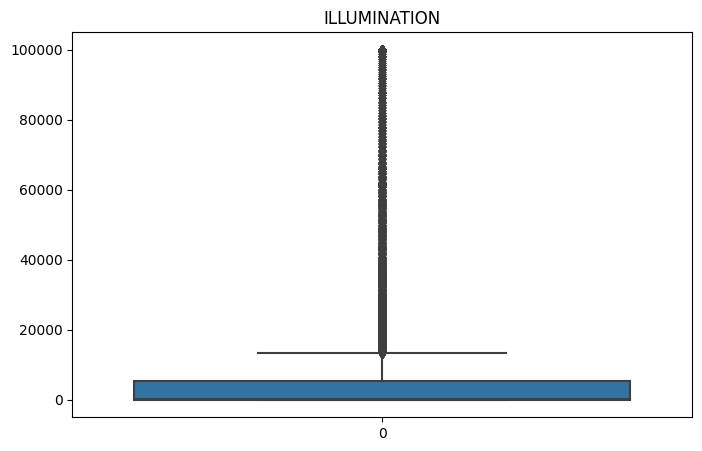

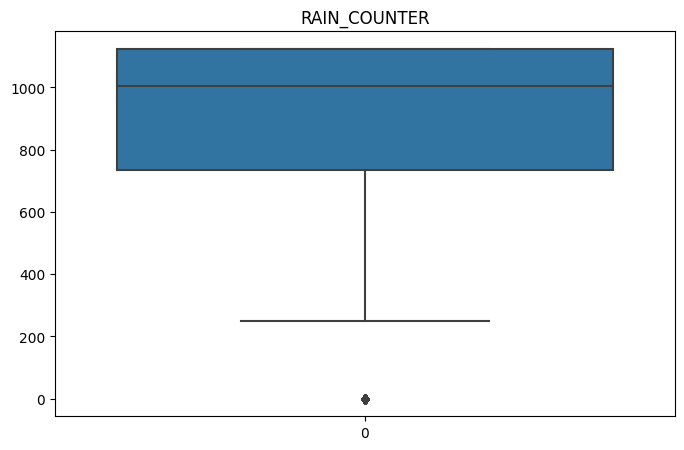

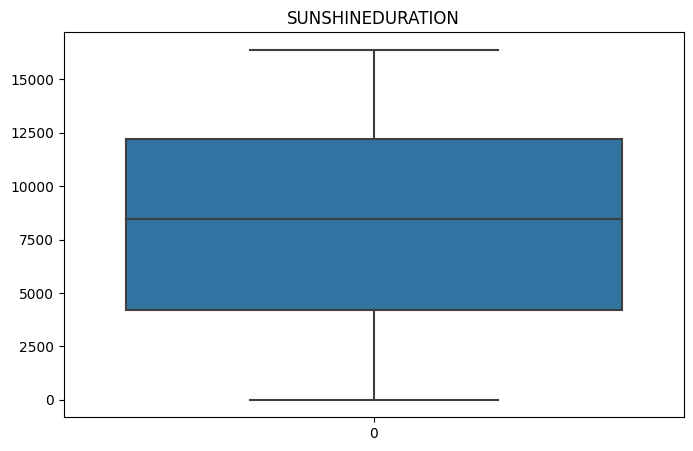

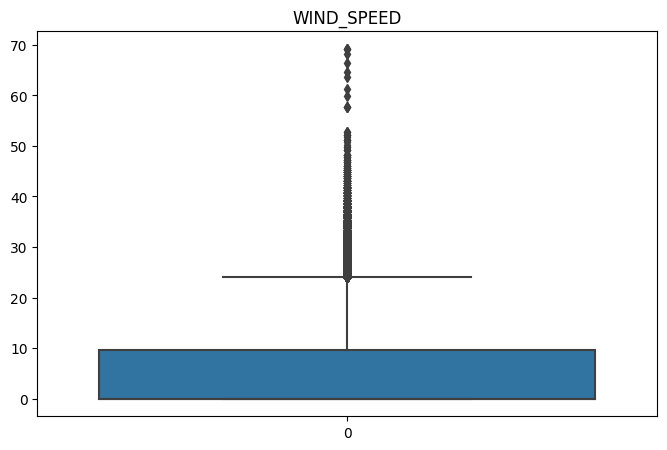

In [ ]:
for feature in continuous_feature:
    data = df.copy()

    plt.figure(figsize=(8, 5))

    sns.boxplot(data[feature])
    plt.title(feature)

    plt.show()

# 13. # Check outliers by defining lower and upper bound

In [ ]:
columns_to_check = ['Ticks', 'ACTUAL_TEMPERATURE', 'HUMIDITY', 'ILLUMINATION', 'RAIN_COUNTER', 'SUNSHINEDURATION', 'WIND_SPEED']

# Loop through each column and check for outliers
for column in columns_to_check:
    # Calculate IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and filter outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Print or visualize outliers
    print(f"Outliers in {column}: {outliers.shape[0]}")
    print(outliers)

Outliers in Ticks: 1
                  TimeStamp        Date      Time           Ticks  \
264399  2023-10-21 05:48:00  2023-10-21  05:48:00  63833464080000   

        ACTUAL_TEMPERATURE   HUMIDITY  ILLUMINATION  RAIN_COUNTER  \
264399           15.791595  72.300053   5748.246781      895.0343   

        SUNSHINEDURATION  WIND_SPEED  
264399       8264.934904    5.425784  
Outliers in ACTUAL_TEMPERATURE: 1140
                            TimeStamp        Date      Time  \
1955    2022-10-17 03:48:00.000000000  2022-10-17  03:48:00   
3207    2022-10-18 21:50:00.000000000  2022-10-18  21:50:00   
3208    2022-10-18 21:52:00.000000000  2022-10-18  21:52:00   
3209    2022-10-18 21:54:00.000000000  2022-10-18  21:54:00   
3213    2022-10-18 22:02:00.000000000  2022-10-18  22:02:00   
...                               ...         ...       ...   
258512            2023-10-12 23:58:00  2023-10-12  23:58:00   
263087            2023-10-19 08:30:00  2023-10-19  08:30:00   
263088            2

#14.  Outliers was not remove to keep the nature of data and to avoid any missing of valuable information.

# 15. Generate count plots for each discrete feature, in order to visually inspect the distribution of discrete values.

In [ ]:
discrete_feature

[]

#The empty output for discrete_feature simply means that the dataset is more focused on continuous measurements or time-related information.

In [ ]:
for feature in continuous_feature:
    print(feature)

Ticks
ACTUAL_TEMPERATURE
HUMIDITY
ILLUMINATION
RAIN_COUNTER
SUNSHINEDURATION
WIND_SPEED


#14. Quantile-Quantile (Q-Q) plots for detecting deviations from normality.

In [ ]:
def qq_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

Ticks


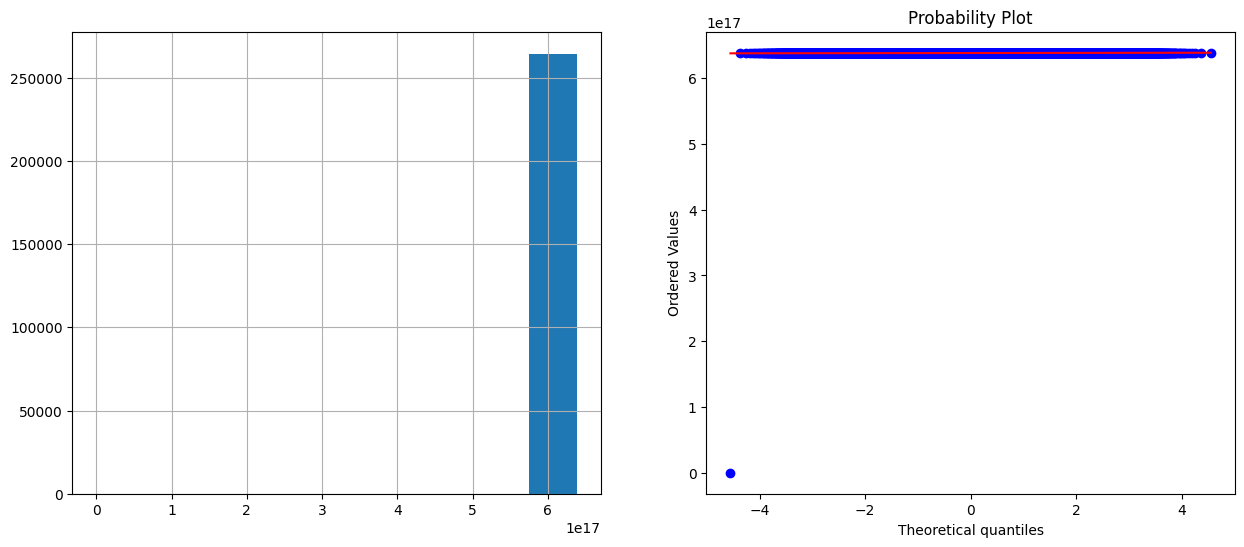

ACTUAL_TEMPERATURE


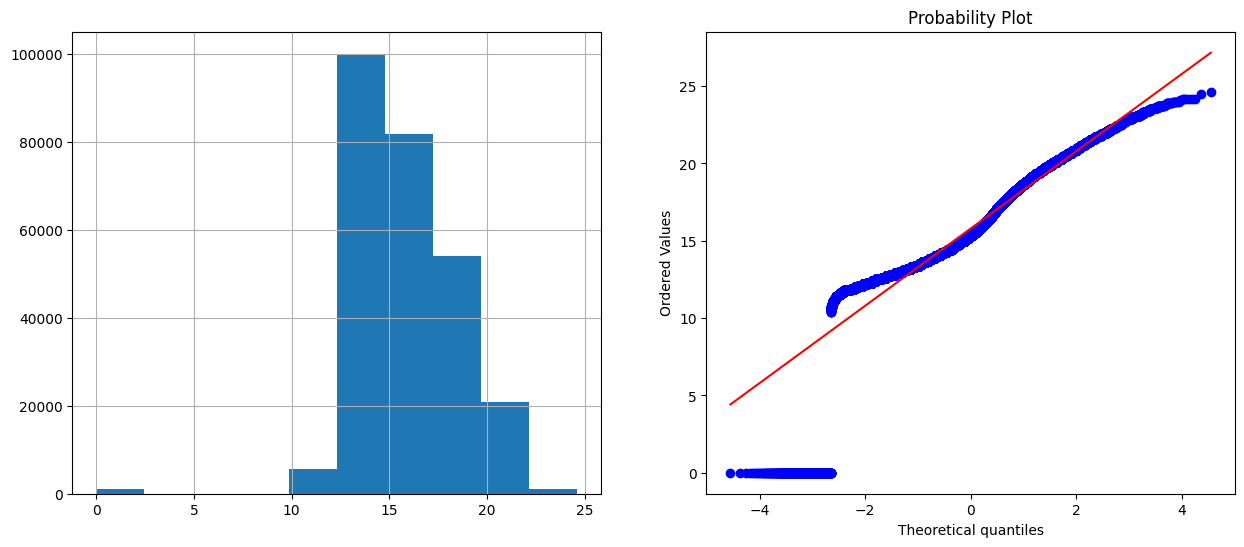

HUMIDITY


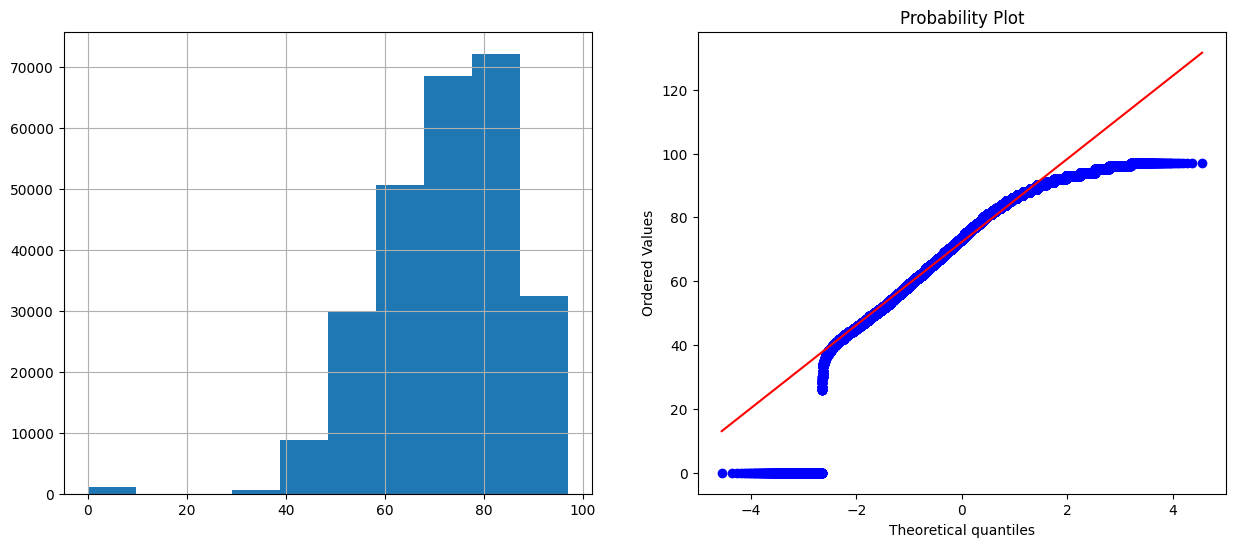

ILLUMINATION


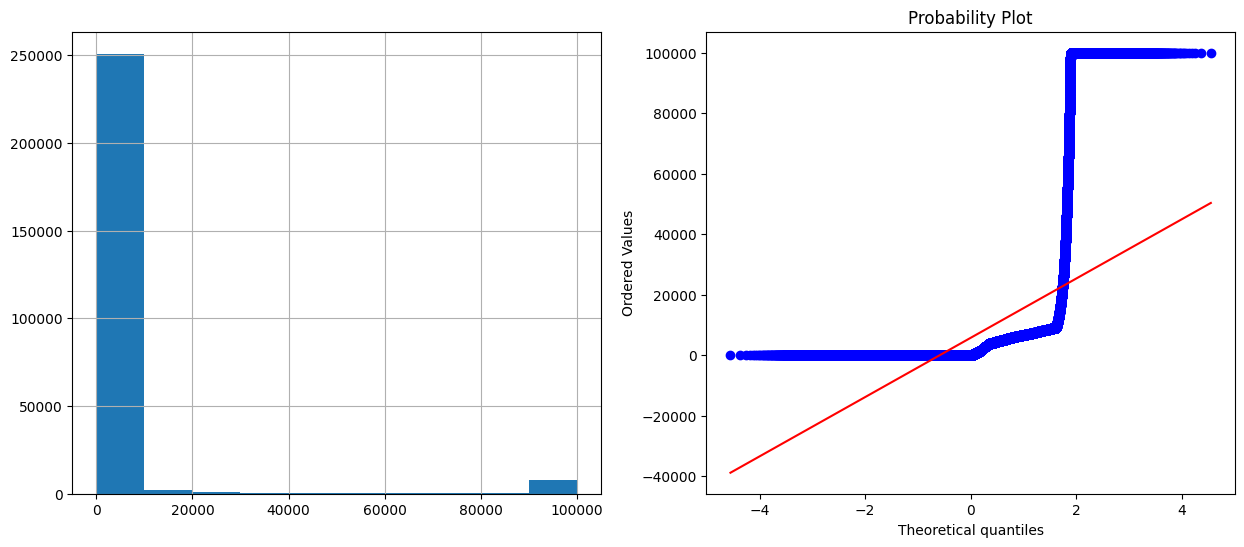

RAIN_COUNTER


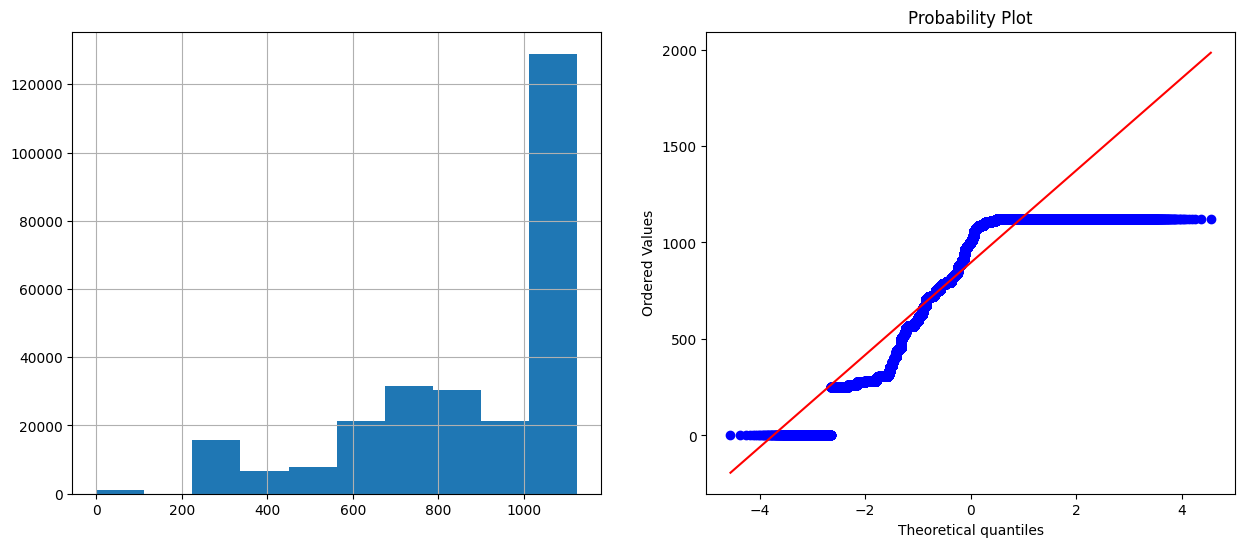

SUNSHINEDURATION


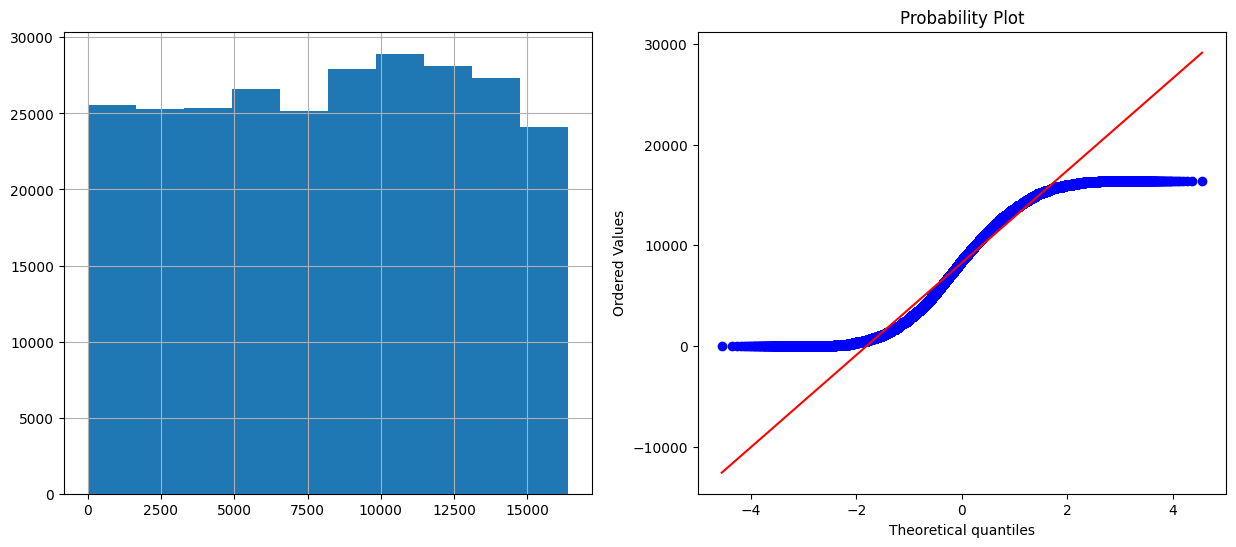

WIND_SPEED


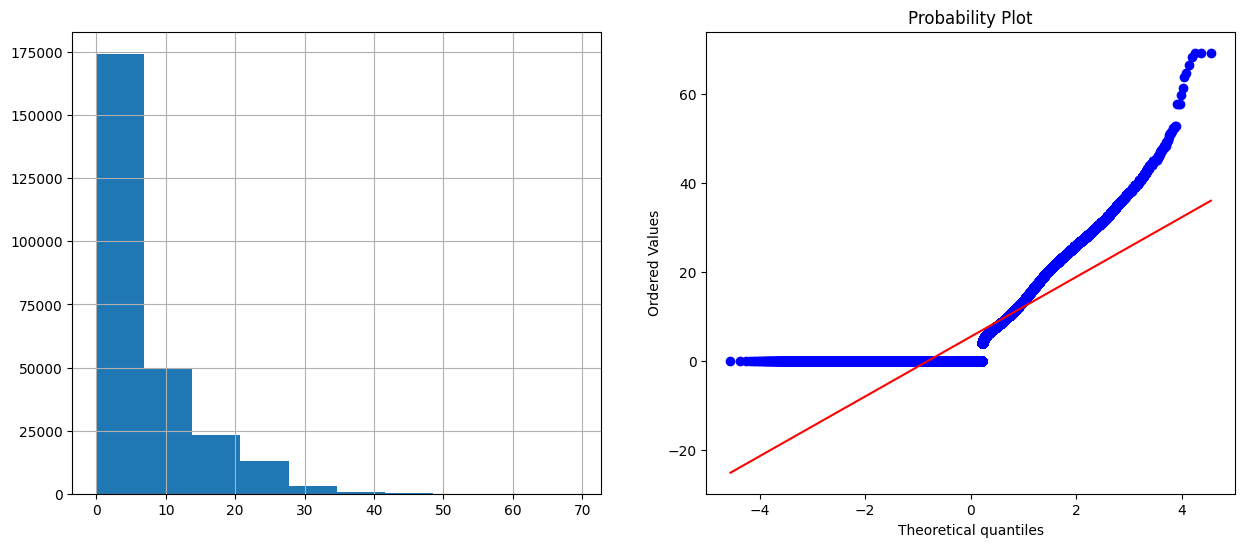

In [ ]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

#Deviation from normality was ignored in the analysis, leveraging the robustness of Random Forest Regression to outliers, thereby preserving valuable information and avoiding the need for outlier removal.

#15. Visualization of how other weather parameters change concerning the RAIN_COUNTER

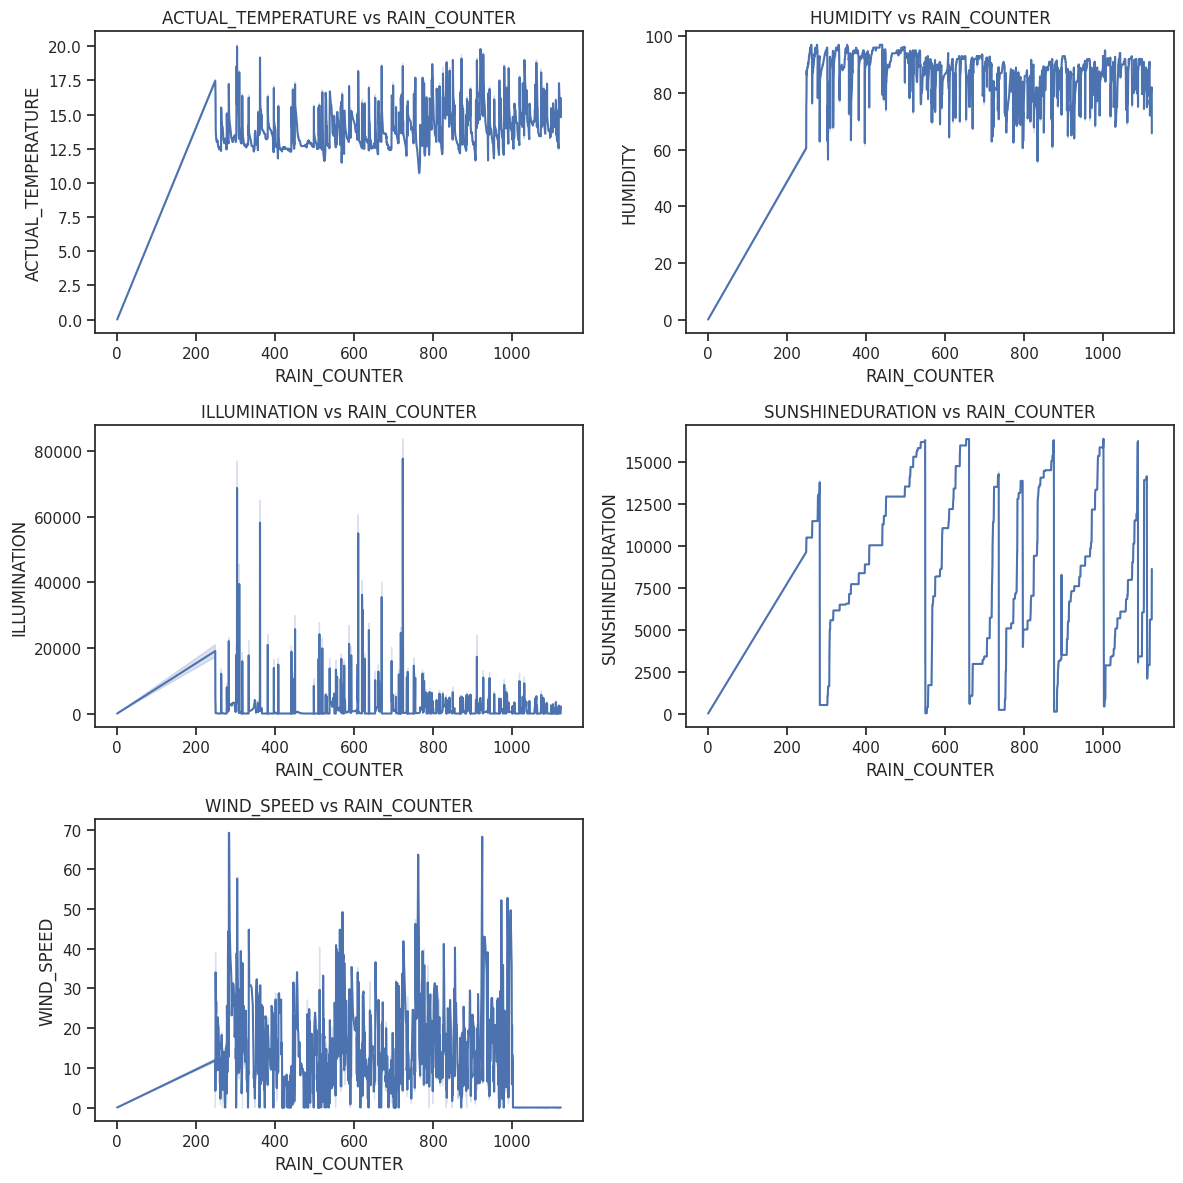

In [ ]:
# Set the style
sns.set(style="ticks")

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Plot each variable against 'RAIN_COUNTER'
sns.lineplot(x='RAIN_COUNTER', y='ACTUAL_TEMPERATURE', data=df, ax=axes[0, 0])
axes[0, 0].set_title('ACTUAL_TEMPERATURE vs RAIN_COUNTER')

sns.lineplot(x='RAIN_COUNTER', y='HUMIDITY', data=df, ax=axes[0, 1])
axes[0, 1].set_title('HUMIDITY vs RAIN_COUNTER')

sns.lineplot(x='RAIN_COUNTER', y='ILLUMINATION', data=df, ax=axes[1, 0])
axes[1, 0].set_title('ILLUMINATION vs RAIN_COUNTER')

sns.lineplot(x='RAIN_COUNTER', y='SUNSHINEDURATION', data=df, ax=axes[1, 1])
axes[1, 1].set_title('SUNSHINEDURATION vs RAIN_COUNTER')

sns.lineplot(x='RAIN_COUNTER', y='WIND_SPEED', data=df, ax=axes[2, 0])
axes[2, 0].set_title('WIND_SPEED vs RAIN_COUNTER')

# Hide the empty subplot
axes[2, 1].axis('off')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


#16. Prepare Data for Machine learning, train them, predict, and evaluate the model.

Mean Squared Error: 6.03081254556557


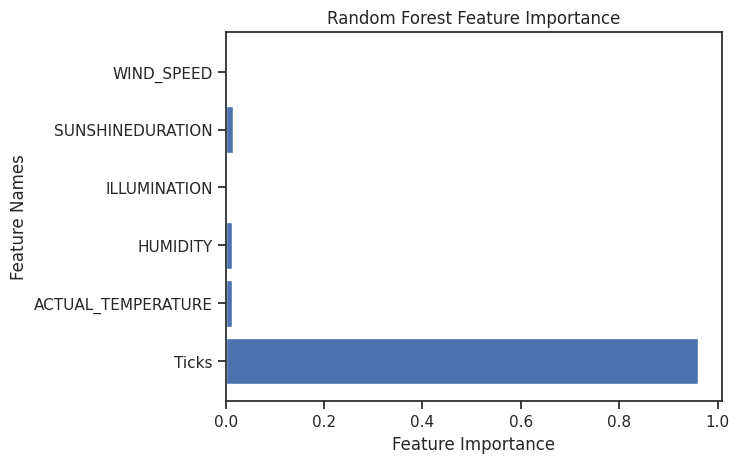

In [ ]:
# Selecting relevant features for prediction
selected_features = ['Ticks', 'ACTUAL_TEMPERATURE', 'HUMIDITY', 'ILLUMINATION', 'SUNSHINEDURATION', 'WIND_SPEED']

# Setting X (features) and Y (target variable)
X = df[selected_features]
Y = df['RAIN_COUNTER']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Instantiate the RandomForestRegressor with adjusted hyperparameters
rf_model = RandomForestRegressor(n_estimators=1000, max_depth=None, min_samples_split=2, random_state=0)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Get feature importances
feature_importance = rf_model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Random Forest Feature Importance')
plt.show()


1. Reason for mse: A Mean Squared Error (MSE) of 6.03081254556557 is a measure of the average squared difference between predicted and actual values. In the context of your regression model for predicting 'RAIN_COUNTER', a lower MSE indicates better model performance. This value suggests that, on average, the squared difference between your predicted and actual 'RAIN_COUNTER' values is quite small, indicating good predictive accuracy.

2. Reason why ticks are more impantant features in model
Temporal Patterns: The time of day, day of the week, or seasonal variations might be influencing rainfall. For example, certain times of the day or specific seasons may have a higher likelihood of rainfall.

Data Collection Frequency: If "Ticks" represents the timestamp of data collection, the model might be capturing patterns related to the frequency or regularity of data collection. It could be learning from patterns that emerge based on how frequently data is recorded.

Weather Seasonality: Certain weather conditions might be more prevalent during specific times of the day, week, or year. The model might be picking up on these patterns.


17. R2 score to check how model explain the target (rainfall)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

R2 Score: 0.9999123924820407


A R2 Score of 0.9999123924820407 indicates that model explains a significant amount of the variance in the target variable. R2 Score ranges from 0 to 1, where 1 indicates a perfect prediction. In this case, a score of 00.9999123924820407 is quite high, suggesting that model is performing well in explaining the variability in the observed rainfall data.

In [ ]:
# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print or display the DataFrame
print(results_df)
# Describe actual and predicted values
print("\nDescriptive Summary of Actual Values:")
print(results_df['Actual'].describe())

print("\nDescriptive Summary of Predicted Values:")
print(results_df['Predicted'].describe())


        Actual  Predicted
254081  1123.7     1123.7
55845    718.3      718.3
238322  1123.7     1123.7
164469  1103.9     1103.9
211637  1123.7     1123.7
...        ...        ...
210249  1123.7     1123.7
124068   971.7      971.7
213256  1123.7     1123.7
66227    736.0      736.0
252143  1123.7     1123.7

[66100 rows x 2 columns]

Descriptive Summary of Actual Values:
count    66100.000000
mean       895.064511
std        262.373828
min          0.000000
25%        736.000000
50%       1002.100000
75%       1123.700000
max       1123.700000
Name: Actual, dtype: float64

Descriptive Summary of Predicted Values:
count    66100.000000
mean       895.059530
std        262.373144
min          0.000000
25%        736.000000
50%       1002.100000
75%       1123.700000
max       1123.700000
Name: Predicted, dtype: float64


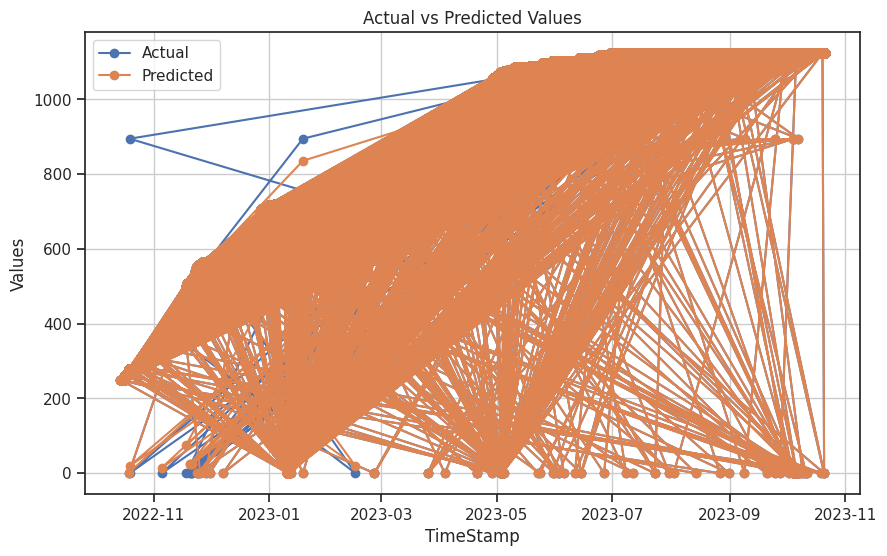

In [ ]:
# Assuming 'TimeStamp' is the correct name of your timestamp column in the original df
# Get predictions
y_pred = rf_model.predict(X_test)

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'TimeStamp': df.loc[X_test.index, 'TimeStamp']})

# Convert 'TimeStamp' to datetime format
results_df['TimeStamp'] = pd.to_datetime(results_df['TimeStamp'])

# Set 'TimeStamp' as the index
results_df.set_index('TimeStamp', inplace=True)

# Plot actual and predicted values with datetime as the index
plt.figure(figsize=(10, 6))
plt.plot(results_df.index, results_df['Actual'], label='Actual', marker='o')
plt.plot(results_df.index, results_df['Predicted'], label='Predicted', marker='o')
plt.title('Actual vs Predicted Values')
plt.xlabel('TimeStamp')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


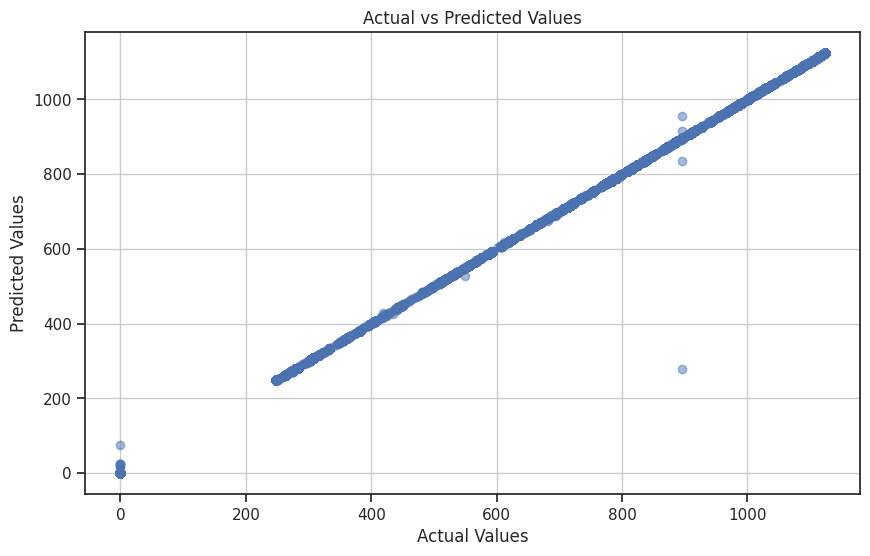

In [ ]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Actual'], results_df['Predicted'], alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


17. Z_score to ensure that features are on similar scale

In [ ]:
# Calculate z-score
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print the z-score of the scaled data
print("Z-score of the scaled training data:")
print(X_train_scaled)

print("\nZ-score of the scaled test data:")
print(X_test_scaled)

Z-score of the scaled training data:
[[-0.02461056  1.35199693 -1.07087117  0.10972457  0.30363087  2.33628479]
 [-0.01773619 -0.30563972  0.72780511 -0.32858968  1.64441806  0.12429029]
 [-0.06246472  0.349705   -0.84603663  0.00785232 -0.47824583  3.52539167]
 ...
 [-0.00584518 -0.07434159  0.8776948  -0.11092225  0.42920954  0.57180363]
 [ 0.01927894  0.11840686  0.8776948  -0.10668235  1.47996981 -0.69401981]
 [-0.00975119 -0.80678569  1.17747418 -0.32858968 -0.33857159  0.43115658]]

Z-score of the scaled test data:
[[ 0.10505731 -0.0357919   0.05330151 -0.32858968 -0.11774108 -0.69401981]
 [-0.06208866 -0.96098445 -0.32142272 -0.32858968 -0.40798157  0.29050953]
 [ 0.09171471  0.31115531  0.27813604 -0.16856201  0.98662505 -0.69401981]
 ...
 [ 0.0706303   1.62184475 -1.97020931 -0.09195728  0.88389828 -0.69401981]
 [-0.05329472  0.96650003 -0.54625725 -0.04337029  1.50538454  1.54354688]
 [ 0.10342772 -0.88388507 -0.92098148 -0.32858968 -0.44514261 -0.69401981]]


Based on the Z-score results, it appears that the data points in both the scaled training and test sets are centered around zero and have been standardized to have a mean of approximately zero and a standard deviation of approximately one for each feature. This ensures that the features are on a similar scale, which is important for machine learning algorithms that are sensitive to the scale of input features. The Z-score helps identify outliers and provides insights into the distribution of each feature in relation to the mean and standard deviation. Overall, the Z-score results suggest that the data preprocessing, including standardization, has been performed effectively.

#Option 2: by removing Ticks in selected feature to use in training the model

Mean Squared Error: 1798.3612884199965


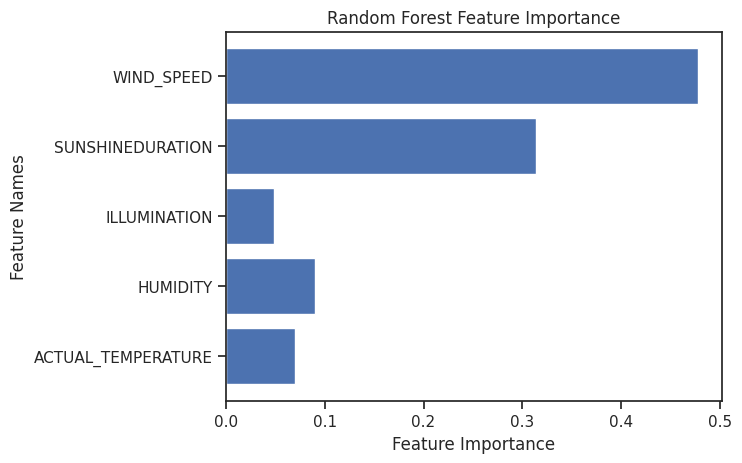

In [76]:
# Selecting relevant features for prediction
selected_features = ['ACTUAL_TEMPERATURE', 'HUMIDITY', 'ILLUMINATION', 'SUNSHINEDURATION', 'WIND_SPEED']

# Setting X (features) and Y (target variable)
X = df[selected_features]
Y = df['RAIN_COUNTER']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Instantiate the RandomForestRegressor with adjusted hyperparameters
rf_model = RandomForestRegressor(n_estimators=2000, max_depth=None, min_samples_split=2, random_state=0)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Get feature importances
feature_importance = rf_model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Random Forest Feature Importance')
plt.show()


In [77]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

R2 Score: 0.9738758305481466


In [78]:
# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print or display the DataFrame
print(results_df)
# Describe actual and predicted values
print("\nDescriptive Summary of Actual Values:")
print(results_df['Actual'].describe())

print("\nDescriptive Summary of Predicted Values:")
print(results_df['Predicted'].describe())


        Actual  Predicted
254081  1123.7  1123.7000
55845    718.3   718.3682
238322  1123.7  1123.6802
164469  1103.9  1100.2821
211637  1123.7  1123.7000
...        ...        ...
210249  1123.7  1122.8049
124068   971.7   969.5302
213256  1123.7  1123.7000
66227    736.0   716.9163
252143  1123.7  1123.7000

[66100 rows x 2 columns]

Descriptive Summary of Actual Values:
count    66100.000000
mean       895.064511
std        262.373828
min          0.000000
25%        736.000000
50%       1002.100000
75%       1123.700000
max       1123.700000
Name: Actual, dtype: float64

Descriptive Summary of Predicted Values:
count    66100.000000
mean       895.538833
std        254.248321
min          0.000000
25%        731.866400
50%       1000.900000
75%       1121.235000
max       1123.700000
Name: Predicted, dtype: float64


#Alternative model: Ensemble

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Select features and target variable
features = ['ACTUAL_TEMPERATURE', 'HUMIDITY', 'ILLUMINATION', 'SUNSHINEDURATION', 'WIND_SPEED']
target = 'RAIN_COUNTER'

# Split the data into features (X) and target variable (y)
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=1000, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=1000, random_state=42)),
]

# Define the stacking model
stacking_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Evaluate the stacking model
y_pred = stacking_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Stacking Model Mean Squared Error: {mse}')

# Compare with individual base models
for name, model in base_models:
    model.fit(X_train, y_train)
    y_pred_base = model.predict(X_test)
    mse_base = mean_squared_error(y_test, y_pred_base)
    print(f'{name} Mean Squared Error: {mse_base}')


Stacking Model Mean Squared Error: 1556.3932068719105


In [2]:
y_pred_base

NameError: ignored